In [ ]:
# In this project, I will build on to codes generated from google colab (https://colab.research.google.com/drive/1ndGpT6mtGAeG_F3fJH9XOunEzfxbJdAu) to extract climate datasets from the gcsfs climate library

In [1]:
# I will start by importing all required python libraries

In [2]:
import glob
import matplotlib.pyplot as plt
import urllib.request
import xarray as xr

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr
import gcsfs
import datetime
import os

In [4]:
# Next, is to read the gcsfs CIMP6 climate metadata from the csv file

df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [5]:
df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
523769,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523770,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523771,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523772,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [6]:
# I will now identify the number of models available for the r1i1p1f1 ensemble under an SSP585 emission scenario, for the variable tas
df_ssp585 = df.query("activity_id=='ScenarioMIP' & table_id == 'Amon' & " +\
    "variable_id == 'tas' & experiment_id == 'ssp585' & member_id == 'r1i1p1f1'")
print('Length of df_ssp585:', len(df_ssp585))
df_ssp585.head(3)

Length of df_ssp585: 35


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
866,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701
19008,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
66586,ScenarioMIP,BCC,BCC-CSM2-MR,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/s...,NaN,20190314


In [7]:
# I will also identify the number of models available for the r1i1p1f1 ensemble under historical simulations for variable tas
df_historical = df.query("activity_id == 'CMIP' & table_id == 'Amon' & " +\
    "variable_id == 'tas' & experiment_id == 'historical' & member_id == 'r1i1p1f1'")
print('Length of df_historical:', len(df_historical))
df_historical.head(3)

Length of df_historical: 55


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
8074,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
29231,CMIP,IPSL,IPSL-CM6A-LR,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
32351,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180827


In [8]:
df_ssp585

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
866,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701
19008,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
66586,ScenarioMIP,BCC,BCC-CSM2-MR,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/s...,NaN,20190314
94452,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429
204046,ScenarioMIP,AWI,AWI-CM-1-1-MR,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/AWI/AWI-CM-1-1-MR...,NaN,20190529
204628,ScenarioMIP,INM,INM-CM4-8,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/INM/INM-CM4-8/ssp...,NaN,20190603
212635,ScenarioMIP,MIROC,MIROC6,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp5...,NaN,20190627
217228,ScenarioMIP,CAMS,CAMS-CSM1-0,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/CAMS/CAMS-CSM1-0/...,NaN,20190708
231165,ScenarioMIP,MPI-M,MPI-ESM1-2-LR,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-...,NaN,20190710
240714,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/DKRZ/MPI-ESM1-2-H...,NaN,20190710


In [9]:
# I will also identify the number of models available for the r1i1p1f1 ensemble under an SSP126 emission scenario for variable tas
df_ssp126 = df.query("activity_id=='ScenarioMIP' & table_id == 'Amon' & " +\
    "variable_id == 'tas' & experiment_id == 'ssp585' & member_id == 'r1i1p1f1'")
print('Length of df_ssp126:', len(df_ssp126))
df_ssp126.head(3)

Length of df_ssp126: 35


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
866,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701
19008,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
66586,ScenarioMIP,BCC,BCC-CSM2-MR,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/s...,NaN,20190314


In [10]:
# I will do same for the SSP245 emission scenario for variable tas
df_ssp245 = df.query("activity_id=='ScenarioMIP' & table_id == 'Amon' & " +\
    "variable_id == 'tas' & experiment_id == 'ssp585' & member_id == 'r1i1p1f1'")
print('Length of df_ssp245:', len(df_ssp245))
df_ssp245.head(3)

Length of df_ssp245: 35


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
866,ScenarioMIP,NOAA-GFDL,GFDL-CM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...,NaN,20180701
19008,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701
66586,ScenarioMIP,BCC,BCC-CSM2-MR,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/s...,NaN,20190314


In [11]:
#I will now work on acquiring data for 35 models that contain both historical and future emission scenarios
# I will start with the CMCC-ESM2 model and then proceed with other models

In [624]:
model = 'CMCC-ESM2'
zstore_hist = df_historical.query(f"source_id == '{model}'").zstore.values[0]
zstore_ssp585 = df_ssp585.query(f"source_id == '{model}'").zstore.values[0]
zstore_ssp245 = df_ssp245.query(f"source_id == '{model}'").zstore.values[0]
zstore_ssp126 = df_ssp126.query(f"source_id == '{model}'").zstore.values[0]
gcs = gcsfs.GCSFileSystem(token='anon')

In [625]:
mapper = gcs.get_mapper(zstore_hist)
ds_hist = xr.open_zarr(mapper, consolidated = True)
mapper = gcs.get_mapper(zstore_ssp585)
ds_ssp585 = xr.open_zarr(mapper, consolidated = True)
mapper = gcs.get_mapper(zstore_ssp245)
ds_ssp245 = xr.open_zarr(mapper, consolidated = True)
mapper = gcs.get_mapper(zstore_ssp126)
ds_ssp126 = xr.open_zarr(mapper, consolidated = True)

In [626]:
ds_hist

<xarray.Dataset> Size: 438MB
Dimensions:    (lat: 192, bnds: 2, lon: 288, time: 1980)
Coordinates:
    height     float64 8B ...
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, bnds) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 438MB dask.array<chunksize=(404, 192, 288), meta=np.ndarray>
Attributes: (12/51)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    cmor_version:           3.6.0
    ...                     ...
    title:                  CMCC-ESM2 output prepared for CMIP6
    tracking_id:            hdl:21.14100/db148e8f-76e1-424c-92e0-8f5abb588c13
    variable_id:            tas
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/db148e8f-76e1-424c-92e0-8f5abb588c13
    version_id:             v20210114

In [627]:
print('hist date range  :', ds_hist.time[0].values, ' , ', ds_hist.time[-1].values)
print('ssp585 date range:', ds_ssp585.time[0].values, ' , ', ds_ssp585.time[-1].values)
print('ssp245 date range:', ds_ssp245.time[0].values, ' , ', ds_ssp245.time[-1].values)
print('ssp126 date range:', ds_ssp126.time[0].values, ' , ', ds_ssp126.time[-1].values)

hist date range  : 1850-01-16 12:00:00  ,  2014-12-16 12:00:00
ssp585 date range: 2015-01-16 12:00:00  ,  2100-12-16 12:00:00
ssp245 date range: 2015-01-16 12:00:00  ,  2100-12-16 12:00:00
ssp126 date range: 2015-01-16 12:00:00  ,  2100-12-16 12:00:00


In [628]:
# I will now extract all datasets from the hoistorical time period. I chose 15 for all dates to make it easier.
start_time = pd.to_datetime(datetime.date(1850,1,15)) # I chose 15 for all dates to make it easier.
time_new_hist = [start_time + pd.DateOffset(months = x) for x in range(len(ds_hist.time))]

start_time = pd.to_datetime(datetime.date(2015,1,15))
time_new_ssp585 = [start_time + pd.DateOffset(months = x) for x in range(len(ds_ssp585.time))]

start_time = pd.to_datetime(datetime.date(2015,1,15))
time_new_ssp245 = [start_time + pd.DateOffset(months = x) for x in range(len(ds_ssp245.time))]

start_time = pd.to_datetime(datetime.date(2015,1,15))
time_new_ssp126 = [start_time + pd.DateOffset(months = x) for x in range(len(ds_ssp126.time))]

In [629]:
ds_hist = ds_hist.assign_coords(time = time_new_hist)
ds_ssp585 = ds_ssp585.assign_coords(time = time_new_ssp585)
ds_ssp245 = ds_ssp245.assign_coords(time = time_new_ssp245) 
ds_ssp126 = ds_ssp126.assign_coords(time = time_new_ssp126)

In [630]:
# Next, I will select the date range for pre-industrial (pre-1900) and baseling line (1986-2014) periods
start_date = pd.to_datetime(datetime.date(1850,1,1))
end_date = pd.to_datetime(datetime.date(1900,12,31))
ds_hist_sel = ds_hist.isel(time=(ds_hist.time >= start_date) & (ds_hist.time <= end_date))

start_date = pd.to_datetime(datetime.date(1987,1,1))
end_date = pd.to_datetime(datetime.date(2014,12,31))
ds_curr_sel = ds_hist.isel(time=(ds_hist.time >= start_date) & (ds_hist.time <= end_date))

# I will now select a date range for the 2071-2100 period
start_date = pd.to_datetime(datetime.date(2071,1,1))
end_date = pd.to_datetime(datetime.date(2099,12,31))
ds_ssp585_sel_2071_2100 = ds_ssp585.isel(time=(ds_ssp585.time >= start_date) & (ds_ssp585.time <= end_date))

start_date = pd.to_datetime(datetime.date(2071,1,1))
end_date = pd.to_datetime(datetime.date(2099,12,31))
ds_ssp245_sel_2071_2100 = ds_ssp245.isel(time=(ds_ssp245.time >= start_date) & (ds_ssp245.time <= end_date))

start_date = pd.to_datetime(datetime.date(2071,1,1))
end_date = pd.to_datetime(datetime.date(2099,12,31))
ds_ssp126_sel_2071_2100 = ds_ssp126.isel(time=(ds_ssp126.time >= start_date) & (ds_ssp126.time <= end_date))


# Repeat process for the 2041-2070 period
start_date = pd.to_datetime(datetime.date(2041,1,1))
end_date = pd.to_datetime(datetime.date(2070,12,31))
ds_ssp585_sel_2041_2070 = ds_ssp585.isel(time=(ds_ssp585.time >= start_date) & (ds_ssp585.time <= end_date))

start_date = pd.to_datetime(datetime.date(2041,1,1))
end_date = pd.to_datetime(datetime.date(2070,12,31))
ds_ssp245_sel_2041_2070 = ds_ssp245.isel(time=(ds_ssp245.time >= start_date) & (ds_ssp245.time <= end_date))

start_date = pd.to_datetime(datetime.date(2041,1,1))
end_date = pd.to_datetime(datetime.date(2070,12,31))
ds_ssp126_sel_2041_2070 = ds_ssp126.isel(time=(ds_ssp126.time >= start_date) & (ds_ssp126.time <= end_date))


# Also for the 2021-2040 period
start_date = pd.to_datetime(datetime.date(2021,1,1))
end_date = pd.to_datetime(datetime.date(2040,12,31))
ds_ssp585_sel_2021_2040 = ds_ssp585.isel(time=(ds_ssp585.time >= start_date) & (ds_ssp585.time <= end_date))

start_date = pd.to_datetime(datetime.date(2021,1,1))
end_date = pd.to_datetime(datetime.date(2040,12,31))
ds_ssp245_sel_2021_2040 = ds_ssp245.isel(time=(ds_ssp245.time >= start_date) & (ds_ssp245.time <= end_date))

start_date = pd.to_datetime(datetime.date(2021,1,1))
end_date = pd.to_datetime(datetime.date(2040,12,31))
ds_ssp126_sel_2021_2040 = ds_ssp126.isel(time=(ds_ssp126.time >= start_date) & (ds_ssp126.time <= end_date))

In [606]:
# I will now load the datasets and inspect the metadata
ds_hist_sel.load()
ds_curr_sel.load()
ds_ssp585_sel_2071_2100.load()
ds_ssp245_sel_2071_2100.load()
ds_ssp126_sel_2071_2100.load()
ds_ssp585_sel_2041_2070.load()
ds_ssp245_sel_2041_2070.load()
ds_ssp126_sel_2041_2070.load()
ds_ssp585_sel_2021_2040.load()
ds_ssp245_sel_2021_2040.load()
ds_ssp126_sel_2021_2040.load()

<xarray.Dataset> Size: 53MB
Dimensions:    (lat: 192, bnds: 2, lon: 288, time: 240)
Coordinates:
    height     float64 8B 2.0
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, bnds) float64 3kB -90.0 -89.53 -89.53 ... 89.53 89.53 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, bnds) float64 5kB -0.625 0.625 0.625 ... 358.1 358.1 359.4
    time_bnds  (time, bnds) object 4kB 2021-01-01 00:00:00 ... 2041-01-01 00:...
  * time       (time) datetime64[ns] 2kB 2021-01-15 2021-02-15 ... 2040-12-15
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 53MB 254.6 254.7 254.6 ... 266.7 266.7
Attributes: (12/51)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    branch_time_in_parent:  60225.0
    cmor_version:           3.6.0
    ...                     ...
    table_info:             Creation Date:(05 February 2020) MD5:6a248fd76c55...
    title:                  CMCC-ESM2 output prepared for CMIP6
    tracking_id:            hdl:21.14100/5ef6c189-8896-4914-a321-4cc8ddfbc4ec
    variable_id:            tas
    variant_label:          r1i1p1f1
    version_id:             v20210126

In [607]:
# next, is to plot the mean monthly temp for my selected data ranges
tas_avg_hist = ds_hist_sel.groupby('time.month').mean()
tas_avg_curr = ds_curr_sel.groupby('time.month').mean()
tas_avg_ssp585_2071_2100 = ds_ssp585_sel_2071_2100.groupby('time.month').mean()
tas_avg_ssp245_2071_2100 = ds_ssp245_sel_2071_2100.groupby('time.month').mean()
tas_avg_ssp126_2071_2100 = ds_ssp126_sel_2071_2100.groupby('time.month').mean()
tas_avg_ssp585_2041_2070 = ds_ssp585_sel_2041_2070.groupby('time.month').mean()
tas_avg_ssp245_2041_2070 = ds_ssp245_sel_2041_2070.groupby('time.month').mean()
tas_avg_ssp126_2041_2070 = ds_ssp126_sel_2041_2070.groupby('time.month').mean()
tas_avg_ssp585_2021_2040 = ds_ssp585_sel_2021_2040.groupby('time.month').mean()
tas_avg_ssp245_2021_2040 = ds_ssp245_sel_2021_2040.groupby('time.month').mean()
tas_avg_ssp126_2021_2040 = ds_ssp126_sel_2021_2040.groupby('time.month').mean()

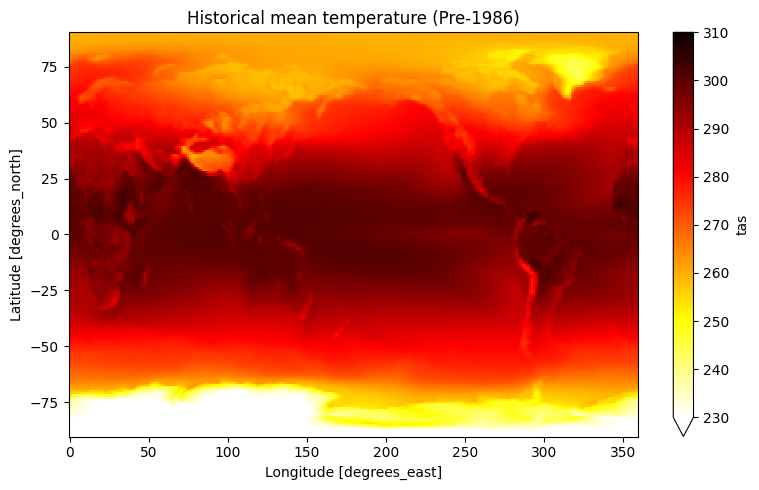

In [608]:
tas_avg_hist.mean('month').tas.plot(figsize=[8,5], cmap = 'hot_r',
                                     vmin = 230, vmax = 310)
plt.title('Historical mean temperature (Pre-1900)')
plt.tight_layout()

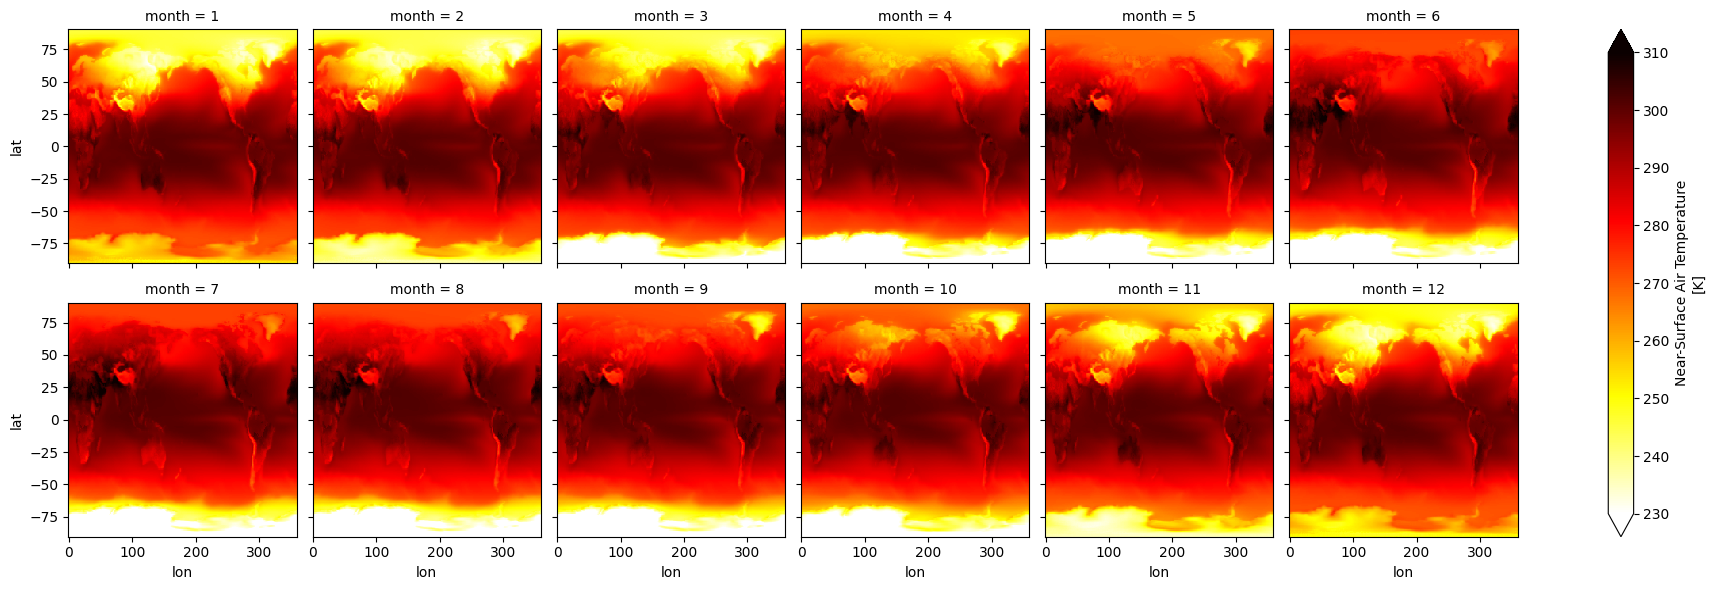

In [609]:
tas_avg_hist.tas.plot(col = 'month', col_wrap = 6, vmax = 310, vmin = 230, cmap = 'hot_r')

In [610]:
# I will now calculate the mean monthly temp change between pre-industrial and current and future temp ranges and plot results

In [611]:
tas_30yr_diff = tas_avg_curr - tas_avg_hist
tas_55yr_diff_ssp126 = tas_avg_ssp126_2021_2040 - tas_avg_hist
tas_55yr_diff_ssp245 = tas_avg_ssp245_2021_2040 - tas_avg_hist
tas_55yr_diff_ssp585 = tas_avg_ssp585_2021_2040 - tas_avg_hist
tas_75yr_diff_ssp126 = tas_avg_ssp126_2041_2070 - tas_avg_hist
tas_75yr_diff_ssp245 = tas_avg_ssp245_2041_2070 - tas_avg_hist
tas_75yr_diff_ssp585 = tas_avg_ssp585_2041_2070 - tas_avg_hist
tas_95yr_diff_ssp126 = tas_avg_ssp126_2071_2100 - tas_avg_hist
tas_95yr_diff_ssp245 = tas_avg_ssp245_2071_2100 - tas_avg_hist
tas_95yr_diff_ssp585 = tas_avg_ssp585_2071_2100 - tas_avg_hist

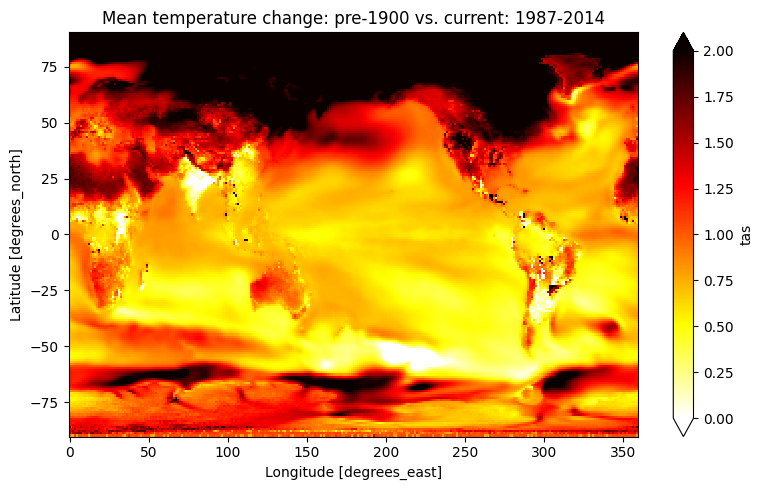

In [612]:
# Next is to plot the temp changes
tas_30yr_diff.mean('month').tas.plot(figsize=[8,5], cmap = 'hot_r',
                                     vmin = 0, vmax = 2)
plt.title('Mean temperature change: pre-1900 vs. current: 1987-2014')
plt.tight_layout()

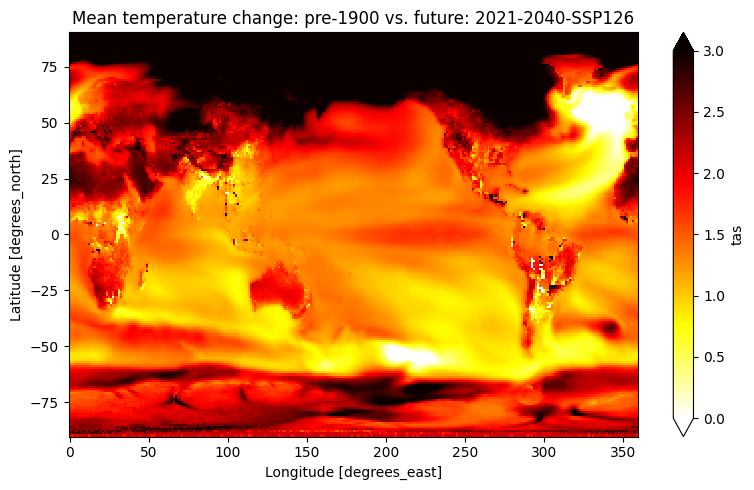

In [613]:
tas_55yr_diff_ssp126.mean('month').tas.plot(figsize=[8,5], cmap = 'hot_r',
                                     vmin = 0, vmax = 3)
plt.title('Mean temperature change: pre-1900 vs. future: 2021-2040-SSP126')
plt.tight_layout()

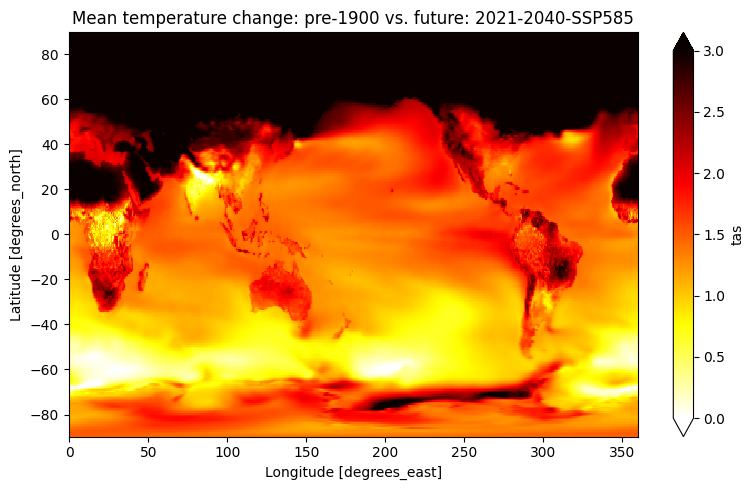

In [595]:
tas_55yr_diff_ssp585.mean('month').tas.plot(figsize=[8,5], cmap = 'hot_r',
                                     vmin = 0, vmax = 3)
plt.title('Mean temperature change: pre-1900 vs. future: 2021-2040-SSP585')
plt.tight_layout()

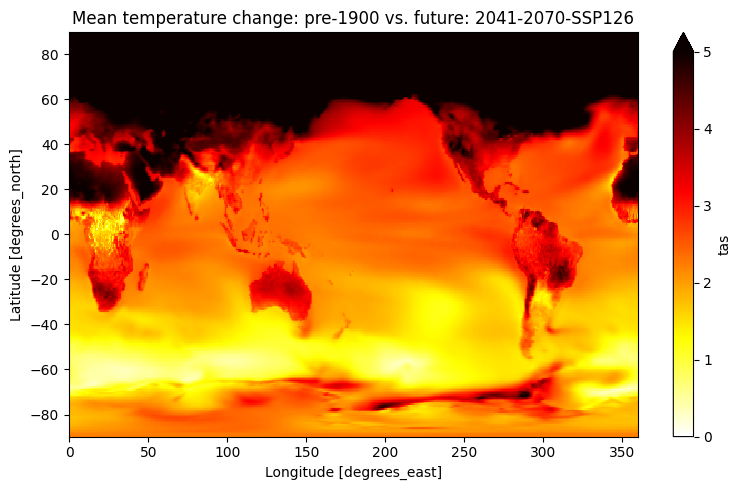

In [596]:
tas_75yr_diff_ssp126.mean('month').tas.plot(figsize=[8,5], cmap = 'hot_r',
                                     vmin = 0, vmax = 5)
plt.title('Mean temperature change: pre-1900 vs. future: 2041-2070-SSP126')
plt.tight_layout()

In [236]:
# I will now save data to disk as netcfd files.
# I will test here (for assurance), and then save to my external file path.
tas_avg_hist.to_netcdf("test1.nc")

In [614]:
#Here, I have updated my pre-industrial time tange to 1850-1900, and the near future to 2021-2040, including their changes
tas_avg_hist.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\pre_industrial\\tas\\updated\\CMCC-ESM2_hist_tas.nc")

tas_avg_ssp585_2021_2040.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\future\\2015_2040\\ssp585\\tas\\updated\\CMCC-ESM2_ssp585_2021_2040_tas.nc")
tas_avg_ssp245_2021_2040.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\future\\2015_2040\\ssp245\\tas\\updated\\CMCC-ESM2_ssp245_2021_2040_tas.nc")
tas_avg_ssp126_2021_2040.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\future\\2015_2040\\ssp126\\tas\\updated\\CMCC-ESM2_ssp126_2021_2040_tas.nc")

In [685]:
#tas_avg_hist.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\pre_industrial\\tas\\KIOST-ESM_hist_tas.nc")
tas_avg_curr.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\current\\tas\\KIOST-ESM_curr_tas.nc")

tas_avg_ssp585_2071_2100.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\future\\2071_2100\\ssp585\\tas\\KIOST-ESM_ssp585_2071_2100_tas.nc")
tas_avg_ssp245_2071_2100.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\future\\2071_2100\\ssp245\\tas\\KIOST-ESM_2071_2100_tas.nc")
tas_avg_ssp126_2071_2100.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\future\\2071_2100\\ssp126\\tas\\KIOST-ESM_ssp126_2071_2100_tas.nc")

tas_avg_ssp585_2041_2070.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\future\\2041_2070\\ssp585\\tas\\KIOST-ESM_ssp585_2041_2070_tas.nc")
tas_avg_ssp245_2041_2070.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\future\\2041_2070\\ssp245\\tas\\KIOST-ESM_ssp245_2041_2070_tas.nc")
tas_avg_ssp126_2041_2070.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\future\\2041_2070\\ssp126\\tas\\KIOST-ESM_ssp126_2041_2070_tas.nc")

#tas_avg_ssp585_2015_2040.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\future\\2015_2040\\ssp585\\tas\\KIOST-ESM_ssp585_2015_2040_tas.nc")
#tas_avg_ssp245_2015_2040.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\future\\2015_2040\\ssp245\\tas\\KIOST-ESM_ssp245_2015_2040_tas.nc")
#tas_avg_ssp126_2015_2040.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\future\\2015_2040\\ssp126\\tas\\KIOST-ESM_ssp126_2015_2040_tas.nc")

In [248]:
# Next, is to save data for changes relative to pre-industrial warming conditions

In [615]:
# I am updating historical and near future change as above
tas_30yr_diff.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\change\\pre_industrial_current\\updated\\CMCC-ESM2_change_curr_hist_tas.nc")

tas_55yr_diff_ssp126.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\change\\pre_industrial_2015_2040\\ssp126\\tas\\\\updated\\CMCC-ESM2_hist_2021_2040_ssp126_tas.nc")
tas_55yr_diff_ssp245.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\change\\pre_industrial_2015_2040\\ssp245\\tas\\\\updated\\CMCC-ESM2_hist_2021_2040_ssp245_tas.nc")
tas_55yr_diff_ssp585.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\change\\pre_industrial_2015_2040\\ssp585\\tas\\\\updated\\CMCC-ESM2_hist_2021_2040_ssp585_tas.nc")



In [686]:
#tas_30yr_diff.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\change\\pre_industrial_current\\KIOST-ESM_change_curr_hist_tas.nc")

#tas_55yr_diff_ssp126.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\change\\pre_industrial_2015_2040\\ssp126\\tas\\KIOST-ESM_hist_2015_2040_ssp126_tas.nc")
#tas_55yr_diff_ssp245.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\change\\pre_industrial_2015_2040\\ssp245\\tas\\KIOST-ESM_hist_2015_2040_ssp245_tas.nc")
#tas_55yr_diff_ssp585.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\change\\pre_industrial_2015_2040\\ssp585\\tas\\KIOST-ESM_hist_2015_2040_ssp585_tas.nc")

tas_75yr_diff_ssp126.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\change\\pre_industrial_2041_2070\\ssp126\\tas\\KIOST-ESM_hist_2041_2070_ssp126_tas.nc")
tas_75yr_diff_ssp245.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\change\\pre_industrial_2041_2070\\ssp245\\tas\\KIOST-ESM_hist_2041_2070_ssp245_tas.nc")
tas_75yr_diff_ssp585.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\change\\pre_industrial_2041_2070\\ssp585\\tas\\KIOST-ESM_hist_2041_2070_ssp585_tas.nc")

tas_95yr_diff_ssp126.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\change\\pre_industrial_2071_2100\\ssp126\\tas\\KIOST-ESM_hist_2071_2100_ssp126_tas.nc")
tas_95yr_diff_ssp245.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\change\\pre_industrial_2071_2100\\ssp245\\tas\\KIOST-ESM_hist_2071_2100_ssp245_tas.nc")
tas_95yr_diff_ssp585.to_netcdf("E:\\CIMP6_climate_data\\from_python_script\\change\\pre_industrial_2071_2100\\ssp585\\tas\\KIOST-ESM_hist_2071_2100_ssp585_tas.nc")

In [28]:
# Next is to repeat all processes for the tas using a different GCM. We will duplicate the entire work and keep this one as a template